In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('..')
os.environ["THEANO_FLAGS"] = "device=cpu"
os.environ["OMP_NUM_THREADS"] = "1"
from tasks import check
import numpy as np
from copy import deepcopy

Couldn't import dot_parser, loading of dot files will not be possible.


/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
from sklearn.manifold import TSNE
import pickle
dt = pickle.load(open("../figs/tsnesate"))
res_iccc  = dt["res"]
X = res_iccc['images_extended'][0:3000]
C = res_iccc['code_extended']

In [ ]:
params = [{
    "layer_name": "wta_spatial",
    #"folder": "out",
    "max": True,
    "tsne": True,
    "nb_clusters": 100,
    "make_bool": False,
    "threshold": 2,
    "algo": "kmeans",
    "filenames_pattern": "../figs/sparseautoencoder_multipleruns/*random*/**/*.png",
    "force_nb": 3000,
    "tsneparams": {"perplexity": 15, "early_exaggeration": 20},
    "code_extended": C
}]
res = check(what="clusterfinder", 
            filename="../training/initial_models/model_E.pkl", 
            dataset="digits",
            params=params,
            folder='out',
            batch_size=3000)

In [ ]:
res.keys()

In [ ]:
plt.hist(res['code_extended'].flatten(), alpha=0.5)
plt.hist(res_iccc['code_extended'].flatten(), alpha=0.5)

In [ ]:
print(res['code_2d'].sum())
print(res_iccc['code_2d'].sum())

In [4]:
code_2d = res['code_2d']
categories = res['categories']
ss = np.arange(code_2d.shape[0])
code_2d = code_2d[ss]
categories = categories[ss]

NameError: name 'res' is not defined

In [6]:
code_2d = res_iccc['code_2d']
categories = res_iccc['categories']
ss = np.arange(code_2d.shape[0])
code_2d = code_2d[ss]
categories = categories[ss]

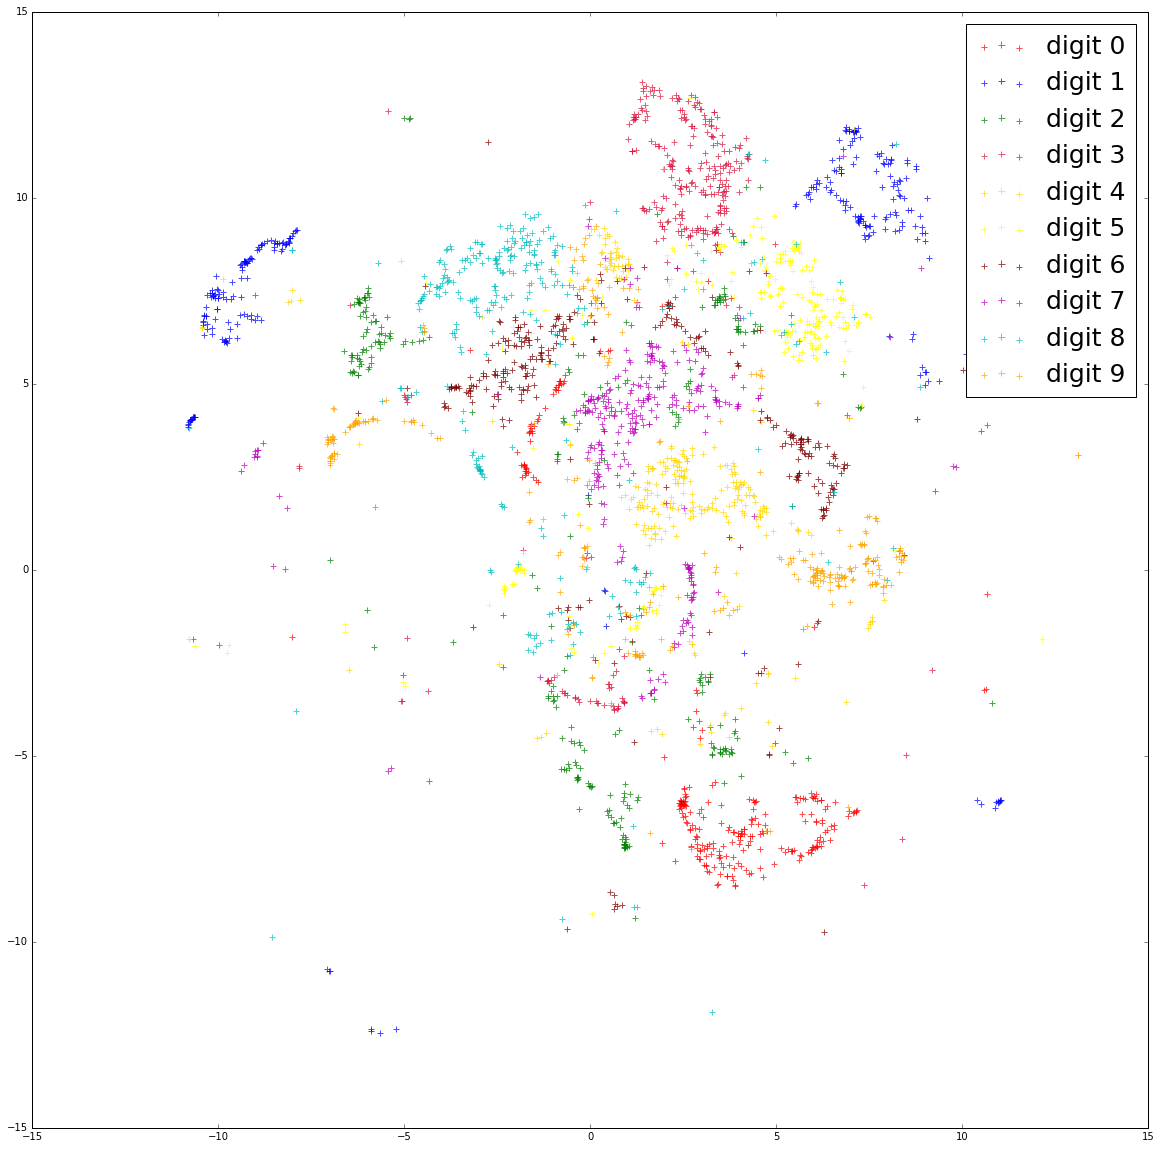

In [8]:
fig = plt.figure(figsize=(20, 20))

colors = [
    'r',
    'b',
    'g',
    'crimson',
    'gold',
    'yellow',
    'maroon',
    'm',
    'c',
    'orange'
]
g = categories >= 0
for cat in range(0, 10):
    g = categories == cat
    plt.scatter(code_2d[g, 0], code_2d[g, 1], 
                marker='+', c=colors[cat], s=40, alpha=0.7, 
                label="digit {}".format(cat))
#g = categories < 0
#plt.scatter(code_2d[g, 0], code_2d[g, 1], marker='+', 
#            c='gray', s=30)
plt.legend(fontsize=25)

plt.show()

## reproducing ICCC tsne plot

In [2]:
from sklearn.manifold import TSNE
import pickle
dt = pickle.load(open("../figs/tsnesate"))
res  = dt["res"]

In [3]:
code_2d = res['code_2d']
categories = res['categories']
ss = np.arange(code_2d.shape[0])
#ss = np.random.choice(np.arange(code_2d.shape[0]), size=4000, replace=False)

code_2d = code_2d[ss]
categories = categories[ss]


In [ ]:
np.random.seed(2)
np.random.choice(np.arange(154150), size=3000, replace=False)
clus = algo(n_clusters=nb_clusters, verbose=0, n_jobs=40, n_init=30)
sne = TSNE(verbose=1, n_components=2, perplexity=15, early_exaggeration=20)
code_2d = sne.fit_transform(res['code_extended'])
categories = res['categories']

In [ ]:
%matplotlib inline
#%matplotlib nbagg

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))

colors = [
    'r',
    'b',
    'g',
    'crimson',
    'gold',
    'yellow',
    'maroon',
    'm',
    'c',
    'orange'
]
g = categories >= 0
for cat in range(0, 10):
    g = categories == cat
    plt.scatter(code_2d[g, 0], code_2d[g, 1], 
                marker='+', c=colors[cat], s=40, alpha=0.7, 
                label="digit {}".format(cat))
g = categories < 0
plt.scatter(code_2d[g, 0], code_2d[g, 1], marker='+', 
            c='gray', s=30)
plt.legend(fontsize=25)
plt.show()

## New plots

In [4]:
iccc_images = res_iccc['images_extended']
iccc_code = res_iccc['code_extended']

NameError: name 'res_iccc' is not defined

In [6]:
code_2d = res_iccc['code_2d']
categories = res_iccc['categories']

In [ ]:
np.random.seed(2)
sne = TSNE(verbose=1, n_components=2, perplexity=15, early_exaggeration=20)
#code_2d = sne.fit_transform(iccc_images.reshape((iccc_images.shape[0], -1)))
code_2d = sne.fit_transform(iccc_code[0:3000])
categories = res_iccc['categories']

In [ ]:
code_2d = (code_2d - code_2d.mean(axis=0, keepdims=True)) / (code_2d.std(axis=0, keepdims=True))

In [ ]:
fig = plt.figure(figsize=(20, 20))

colors = [
    'r',
    'b',
    'g',
    'crimson',
    'gold',
    'yellow',
    'maroon',
    'm',
    'c',
    'orange'
]
plot_dataset = False
if plot_dataset:
    g = categories >= 0
    for cat in range(0, 10):
        g = categories == cat
        plt.scatter(code_2d[g, 0], code_2d[g, 1], 
                    marker='+', c=colors[cat], s=40, alpha=0.7, 
                    label="digit {}".format(cat))
g = categories < 0
plt.scatter(code_2d[g, 0], code_2d[g, 1], marker='+', 
            c='gray', s=30)
plt.legend(fontsize=25)

plt.show()

In [ ]:
from lightjob.cli import load_db
from skimage.io import imread
import pandas as pd
db = load_db()

J = db.jobs_with(state='success', type='generation', summary='ea6c0263ed13568ce65343d34bb7bdca')
for j in J:
    id_ = j['summary']
    jref_s = j['content']['model_summary']
    jref = db.get_job_by_summary(jref_s)
    filename = 'jobs/results/{}/tsne_latent.csv'.format(id_)
    if not os.path.exists(filename):
        continue
    img_filename = 'jobs/results/{}/final1000.png'.format(id_)
    if not os.path.exists(img_filename):
        continue
    img_content = imread(img_filename)
    data = pd.read_csv(filename)
    fig = plt.figure(figsize=(20, 30))
    plt.subplot(2, 1, 1)
    plt.scatter(data["x"], data["y"], marker='+', cmap='gray')
    plt.title(id_+'/'+jref_s)
    plt.subplot(2, 1, 2)
    plt.imshow(img_content, cmap='gray')
    plt.title(id_+'/'+jref_s)
    plt.savefig('figs/tsne/{}.png'.format(id_))
    plt.show()
    plt.close(fig)

## save ICCC results as a fake job

In [7]:
from skimage.io import imsave
i = 0
for x in  res_iccc['images_extended'][0:6000]:
    imsave('../jobs/results/iccc/final/{:06d}.png'.format(i), x[0])
    i += 1

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [9]:
import pandas as pd
df = pd.DataFrame({"x": res_iccc['code_2d'][:, 0],
                   "y": res_iccc['code_2d'][:, 1]})

df.to_csv("../jobs/results/iccc/tsne_input.csv")